一、import some package

In [1]:
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np
import resnet
import os
import pandas as pd
import random
from skimage import data, exposure, img_as_float
from skimage.transform import resize
from skimage.io import imread, imshow, imread_collection, concatenate_images
from sklearn.cross_validation import train_test_split

C:\Users\王培志\AppData\Local\conda\conda\envs\Tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\王培志\AppData\Local\conda\conda\envs\Tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


二、读取图片进入X,Y

datasets//A1.jpg
datasets//A2.jpg
datasets//A3.jpg
datasets//A4.jpg
datasets//A5.jpg
datasets//A6.jpg
datasets//A7.jpg
datasets//A8.jpg
datasets//A9.jpg
datasets//A10.jpg
datasets//A11.jpg
datasets//A12.jpg
datasets//A13.jpg
datasets//A14.jpg
datasets//A15.jpg
datasets//A16.jpg
datasets//A17.jpg
datasets//A18.jpg
datasets//A19.jpg
datasets//A20.jpg
datasets//A21.jpg
datasets//A22.jpg
datasets//A23.jpg
datasets//A24.jpg
datasets//A25.jpg
datasets//A26.jpg
datasets//A27.jpg
datasets//A28.jpg
datasets//A29.jpg
datasets//A30.jpg
datasets//A31.jpg
datasets//A32.jpg
datasets//A33.jpg
datasets//A34.jpg
datasets//A35.jpg
datasets//A36.jpg
datasets//A37.jpg
datasets//A38.jpg
datasets//A39.jpg
datasets//A40.jpg
datasets//B1.jpg
datasets//B2.jpg
datasets//B3.jpg
datasets//B4.jpg
datasets//B5.jpg
datasets//B6.jpg
datasets//B7.jpg
datasets//B8.jpg
datasets//B9.jpg
datasets//B10.jpg
datasets//B11.jpg
datasets//B12.jpg
datasets//B13.jpg
datasets//B14.jpg
datasets//B15.jpg
datasets//B16.jpg
datasets//

C:\Users\王培志\AppData\Local\conda\conda\envs\Tensorflow\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


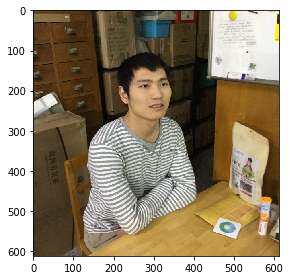

In [2]:
resize_rate=2
nb_classes = 4
dataset_num=int(40+38+75+39)
input_img_rows=2448
input_img_cols=3264
img_rows=612
img_cols=612
img_channels=3
X=np.zeros([dataset_num,img_rows,img_cols,img_channels])
Y=np.zeros([dataset_num,nb_classes])
for i in range(40):
    imagepath=r'datasets//A'+str(i+1)+r'.jpg'
    image_readin=mping.imread(imagepath)
    print(imagepath)
    image=image_readin[:,408:408+input_img_rows,:]
    image=resize(image, (img_rows, img_cols), mode='reflect')
    X[i,:,:,:]=image
    Y[i,0]=1
for i in range(38):
    imagepath=r'datasets//B'+str(i+1)+r'.jpg'
    image_readin=mping.imread(imagepath)
    print(imagepath)
    image=image_readin[:,408:408+input_img_rows,:]
    image=resize(image, (img_rows, img_cols), mode='reflect')
    X[40+i,:,:,:]=image
    Y[40+i,1]=1
for i in range(75):
    imagepath=r'datasets//C'+str(i+1)+r'.jpg'
    print(imagepath)
    image_readin=mping.imread(imagepath)
    image=image_readin[:,408:408+input_img_rows,:]
    image=resize(image, (img_rows, img_cols), mode='reflect')
    X[78+i,:,:,:]=image
    Y[78+i,2]=1
for i in range(39):
    imagepath=r'datasets//D'+str(i+1)+r'.jpg'
    print(imagepath)
    image_readin=mping.imread(imagepath)
    image=image_readin[:,408:408+input_img_rows,:]
    image=resize(image, (img_rows, img_cols), mode='reflect')
    X[153+i,:,:,:]=image
    Y[153+i,3]=1
image_sample=X[2]
imshow(image_sample)

三、网络的一些超参数

In [3]:
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.0005, patience=20)
csv_logger = CSVLogger('imagemodel1_0.csv')
checkpointer = ModelCheckpoint('imagemodel1_0.h5', verbose=1, save_best_only=True)
batch_size = 10
nb_epoch = 150
data_augmentation = False

四、预处理，白化

In [4]:
X=X.astype('float32')
mean_X=np.mean(X,axis=0)
X -= mean_X  #白化，X减去所有数据的均值
X /=128 #这样X大概就是在-1~1之间的分布了

五、搭建网络模型，编译

In [5]:
model = resnet.ResnetBuilder.build_resnet_18((img_channels, img_rows, img_cols), nb_classes)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 612, 612, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 306, 306, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 306, 306, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 306, 306, 64) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

六、分割X={X_train,X_val}  Y={Y_train,Y_val}

In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=42)
print("X_train.shape=",X_train.shape)
print("Y_train.shape=",Y_train.shape)
print("X_val.shape=",X_val.shape)
print("Y_val.shape=",Y_val.shape)

X_train.shape= (163, 612, 612, 3)
Y_train.shape= (163, 4)
X_val.shape= (29, 612, 612, 3)
Y_val.shape= (29, 4)


七、数据增强，训练

In [7]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              verbose=1,
              validation_data=(X_val, Y_val),
              shuffle=True,
              callbacks=[lr_reducer,checkpointer, early_stopper, csv_logger])
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=False,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=False,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                        steps_per_epoch=X_train.shape[0] // batch_size,
                        validation_data=(X_val, Y_val),
                        epochs=nb_epoch, verbose=1, max_q_size=100,
                        callbacks=[lr_reducer,checkpointer, early_stopper, csv_logger])


Not using data augmentation.
Train on 163 samples, validate on 29 samples
Epoch 1/150
160/163 [============================>.] - ETA: 12s - loss: 1.9189 - acc: 0.4813
Epoch 00001: val_loss improved from inf to 13.52872, saving model to imagemodel1_0.h5
163/163 [==============================] - 702s 4s/step - loss: 1.9244 - acc: 0.4724 - val_loss: 13.5287 - val_acc: 0.2069
Epoch 2/150
160/163 [============================>.] - ETA: 11s - loss: 1.5599 - acc: 0.6812
Epoch 00002: val_loss improved from 13.52872 to 13.51007, saving model to imagemodel1_0.h5
163/163 [==============================] - 690s 4s/step - loss: 1.5565 - acc: 0.6871 - val_loss: 13.5101 - val_acc: 0.2069
Epoch 3/150
160/163 [============================>.] - ETA: 12s - loss: 1.6144 - acc: 0.7000
Epoch 00003: val_loss improved from 13.51007 to 13.48390, saving model to imagemodel1_0.h5
163/163 [==============================] - 702s 4s/step - loss: 1.6265 - acc: 0.6871 - val_loss: 13.4839 - val_acc: 0.2069
Epoch 4/15

Epoch 31/150
160/163 [============================>.] - ETA: 11s - loss: 0.4794 - acc: 0.9812
Epoch 00031: val_loss did not improve
163/163 [==============================] - 666s 4s/step - loss: 0.4882 - acc: 0.9816 - val_loss: 4.3503 - val_acc: 0.3448
Epoch 32/150
160/163 [============================>.] - ETA: 11s - loss: 0.4538 - acc: 1.0000
Epoch 00032: val_loss did not improve
163/163 [==============================] - 660s 4s/step - loss: 0.4532 - acc: 1.0000 - val_loss: 4.0465 - val_acc: 0.3448
Epoch 33/150
160/163 [============================>.] - ETA: 11s - loss: 0.4316 - acc: 1.0000
Epoch 00033: val_loss did not improve
163/163 [==============================] - 666s 4s/step - loss: 0.4449 - acc: 0.9939 - val_loss: 3.2873 - val_acc: 0.3793
Epoch 34/150
160/163 [============================>.] - ETA: 11s - loss: 0.4334 - acc: 1.0000
Epoch 00034: val_loss did not improve
163/163 [==============================] - 668s 4s/step - loss: 0.4335 - acc: 1.0000 - val_loss: 2.5749 - 

160/163 [============================>.] - ETA: 11s - loss: 0.4188 - acc: 1.0000
Epoch 00060: val_loss improved from 0.62059 to 0.61642, saving model to imagemodel1_0.h5
163/163 [==============================] - 666s 4s/step - loss: 0.4185 - acc: 1.0000 - val_loss: 0.6164 - val_acc: 0.8966
Epoch 61/150
160/163 [============================>.] - ETA: 11s - loss: 0.4123 - acc: 0.9937
Epoch 00061: val_loss did not improve
163/163 [==============================] - 668s 4s/step - loss: 0.4208 - acc: 0.9939 - val_loss: 0.6205 - val_acc: 0.8966
Epoch 62/150
160/163 [============================>.] - ETA: 11s - loss: 0.4140 - acc: 1.0000
Epoch 00062: val_loss did not improve
163/163 [==============================] - 666s 4s/step - loss: 0.4138 - acc: 1.0000 - val_loss: 0.6221 - val_acc: 0.8966
Epoch 63/150
160/163 [============================>.] - ETA: 11s - loss: 0.4118 - acc: 1.0000
Epoch 00063: val_loss did not improve
163/163 [==============================] - 665s 4s/step - loss: 0.41

八、测试

In [8]:
model = load_model('imagemodel1_0.h5')
pred=model.predict(X_val)
print(pred)
print(Y_val)

[[3.36698085e-01 8.09319764e-02 3.98134083e-01 1.84235826e-01]
 [6.14819801e-05 3.25131603e-03 9.96230066e-01 4.57092072e-04]
 [6.98806078e-04 9.92986977e-01 4.74626571e-03 1.56802300e-03]
 [9.18375445e-04 1.20211067e-03 9.97566700e-01 3.12892080e-04]
 [4.18120576e-03 7.33560741e-01 2.16570318e-01 4.56877761e-02]
 [9.61018610e-04 2.79913569e-04 1.06907464e-05 9.98748302e-01]
 [9.97990966e-01 4.94953347e-05 1.37370208e-03 5.85790433e-04]
 [9.55840468e-01 3.04441724e-04 2.02375297e-02 2.36175563e-02]
 [9.79598463e-01 7.43108278e-04 6.62115542e-03 1.30373370e-02]
 [9.85398054e-01 1.27363363e-02 1.44097558e-03 4.24659345e-04]
 [1.57170813e-03 6.36058176e-05 9.98359978e-01 4.59619696e-06]
 [5.83738089e-03 7.40499914e-01 2.20237955e-01 3.34247313e-02]
 [3.05744186e-02 8.18074405e-01 4.09324362e-04 1.50941834e-01]
 [2.77029420e-03 9.69150841e-01 2.57060956e-02 2.37282016e-03]
 [1.93256722e-03 4.36043949e-04 3.12178774e-04 9.97319162e-01]
 [9.98047948e-01 4.37911513e-04 1.48497743e-03 2.914262

在训练90次后，达到了测试机100%，验证集合89.6%的准确率